# IMPORT

#### IMPORTING REQUIRED MODULE

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from  sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance
from IPython.display import Image, display
from queue import PriorityQueue
import datetime 
import random
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error



# MAP

#### MAP OF OPERATIONAL AREA

![map](map.png "Map Represented in Graph")

# DATASET

#### IMPORTING DATASET

In [2]:
traffic_data = pd.read_csv('/home/rafi/cse404/project/traffic_dataset.csv')

In [3]:
traffic_data

,location,month,day,date,time_block,weather,traffic_indicator
0,begum_rokeya,apr,fri,1,a,1,3
1,begum_rokeya,apr,fri,1,b,1,3
2,begum_rokeya,apr,fri,1,c,1,3
3,begum_rokeya,apr,fri,1,d,1,3
4,begum_rokeya,apr,fri,1,e,1,3
...,...,...,...,...,...,...,...
87655,mirpur_14,sep,wed,30,b,3,2
87656,mirpur_14,sep,wed,30,c,3,2
87657,mirpur_14,sep,wed,30,d,3,2
87658,mirpur_14,sep,wed,30,e,3,3


In [4]:
colN = ['location', 'month', 'day', 'date', 'time_block', 'weather', 'traffic_indicator']

#### ASSIGNING FEATURE AND TARGET

In [5]:
X=traffic_data.drop(columns=['traffic_indicator'])
Y=traffic_data['traffic_indicator']

In [6]:
Y

0        3
1        3
2        3
3        3
4        3
        ..
87655    2
87656    2
87657    2
87658    3
87659    3
Name: traffic_indicator, Length: 87660, dtype: int64

In [7]:
X

,location,month,day,date,time_block,weather
0,begum_rokeya,apr,fri,1,a,1
1,begum_rokeya,apr,fri,1,b,1
2,begum_rokeya,apr,fri,1,c,1
3,begum_rokeya,apr,fri,1,d,1
4,begum_rokeya,apr,fri,1,e,1
...,...,...,...,...,...,...
87655,mirpur_14,sep,wed,30,b,3
87656,mirpur_14,sep,wed,30,c,3
87657,mirpur_14,sep,wed,30,d,3
87658,mirpur_14,sep,wed,30,e,3


#### DATA PREPROCESSING

In [8]:
le=preprocessing.LabelEncoder()

In [9]:
encoded_location = le.fit_transform(traffic_data['location'])
encoded_month = le.fit_transform(traffic_data['month'])
encoded_day = le.fit_transform(traffic_data['day'])
encoded_date = le.fit_transform(traffic_data['date'])
encoded_time_block = le.fit_transform(traffic_data['time_block'])
encoded_weather = le.fit_transform(traffic_data['weather'])
encoded_traffic_indicator = le.fit_transform(traffic_data['traffic_indicator'])

In [10]:
X = np.array(list(zip(encoded_location, encoded_month, encoded_day, encoded_date, encoded_time_block, encoded_weather)))
Y = encoded_traffic_indicator

#### SPLITTING INTO TRAIN & TEST

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

# TRAIN

#### MODEL SELECTION

In [12]:
model = GradientBoostingRegressor()

#### MODEL TRAIN

In [13]:
model.fit(X_train, Y_train)

GradientBoostingRegressor()

#### TRAINING AND TEST DEVIANCE

/home/rafi/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


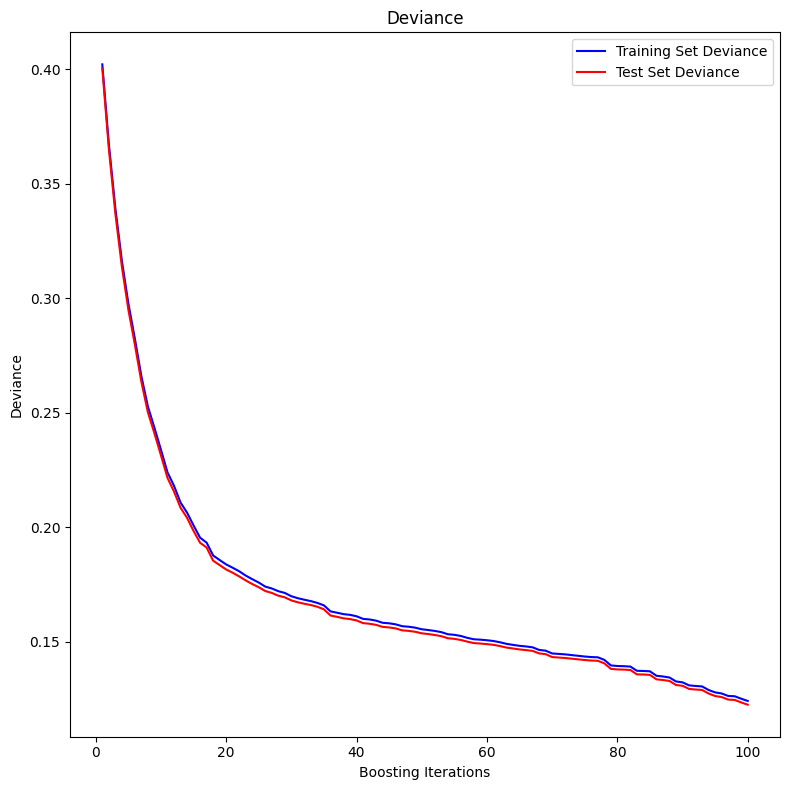

In [14]:
model_params = {'n_estimators': 100,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
test_score = np.zeros((model_params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(model.staged_predict(X_test)):
    test_score[i] = model.loss_(Y_test, y_pred)
 
fig = plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(model_params['n_estimators']) + 1, model.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(model_params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

# TESTING & EVALUATION

In [15]:
prediction = model.predict(X_test)

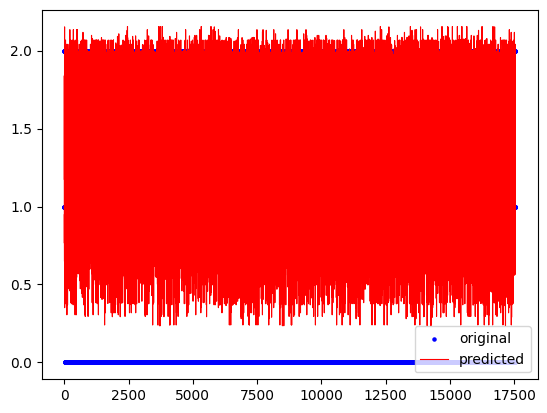

In [16]:
x_ax = range(len(Y_test))
plt.scatter(x_ax, Y_test, s=5, color="blue", label="original")
plt.plot(x_ax, prediction, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [17]:
contigency = [1, 2, 3]
con = lambda : random.choice(contigency)

#### MEAN SQUARE ERROR

In [18]:
mse = mean_squared_error(Y_test, prediction)

In [19]:
mse

0.12263235704394163

#### R2 SCORE (COEFFICIENT OF DETERMINATION)

In [20]:
print('Test R^2     : %.3f'%r2_score(Y_test, prediction))
print('Test R^2     : %.3f'%model.score(X_test, Y_test))
print('Training R^2 : %.3f'%model.score(X_train, Y_train))

Test R^2     : 0.723
Test R^2     : 0.723
Training R^2 : 0.721


#### MEAN ABSOLUTE ERROR (MAE)

In [21]:
print('Test MAE  : %.3f'%mean_absolute_error(Y_test, prediction))
print('Train MAE : %.3f'%mean_absolute_error(Y_train, model.predict(X_train)))

Test MAE  : 0.255
Train MAE : 0.257


#### MEAN SQUARED LOG ERROR

In [22]:
print("Mean Squared Log Error : {:.3f}".format(mean_squared_log_error(Y_test, prediction)))

Mean Squared Log Error : 0.046


#### MEDIAN ABSOLUTE ERROR

In [23]:
print('Median Absolute Error : {}'.format(median_absolute_error(Y_test, prediction)))

Median Absolute Error : 0.18035592330634342


#### MAXIMUM RESIDUAL ERROR

In [24]:
print('Maximum Residual Error : {:.3f}'.format(max_error(Y_test, prediction)))

Maximum Residual Error : 1.077


#### EXPLAINED VARIANCE ERROR

In [25]:
print('Explained Variance Error : {:.3f}'.format(explained_variance_score(Y_test, prediction)))

Explained Variance Error : 0.723


#### FEATURE IMPORTANCE (MDI) & PERMUTATION IMPORTANCE

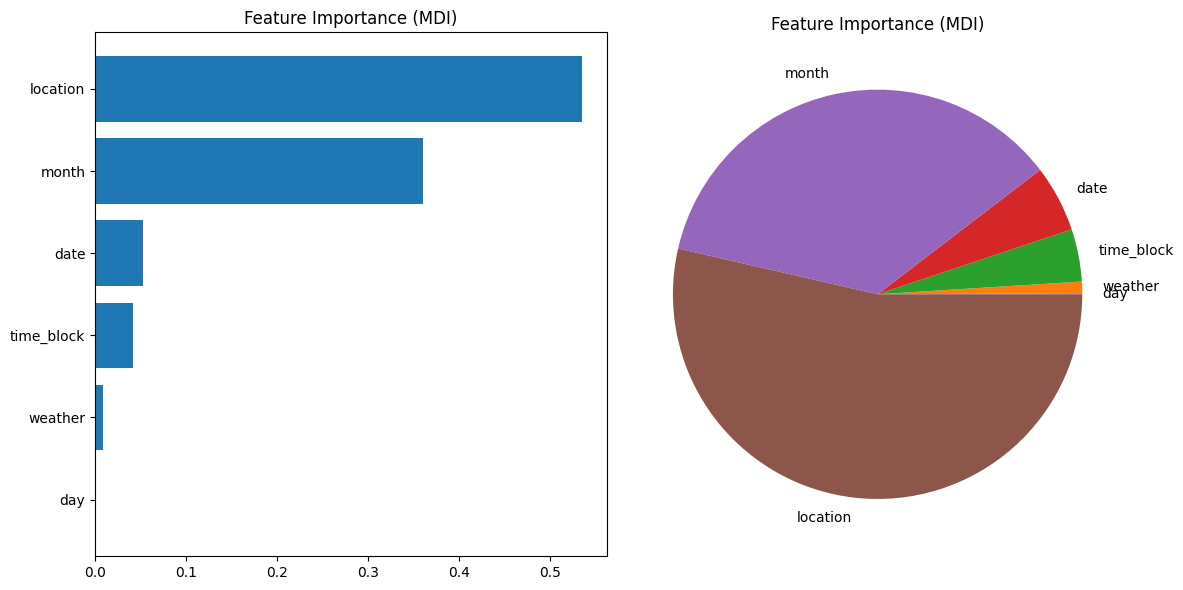

In [26]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(colN)[sorted_idx])
plt.title("Feature Importance (MDI)")

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.subplot(1, 2, 2)
plt.pie(feature_importance[sorted_idx], labels = np.array(colN)[sorted_idx])
plt.title("Feature Importance (MDI)")
fig.tight_layout()
plt.show()

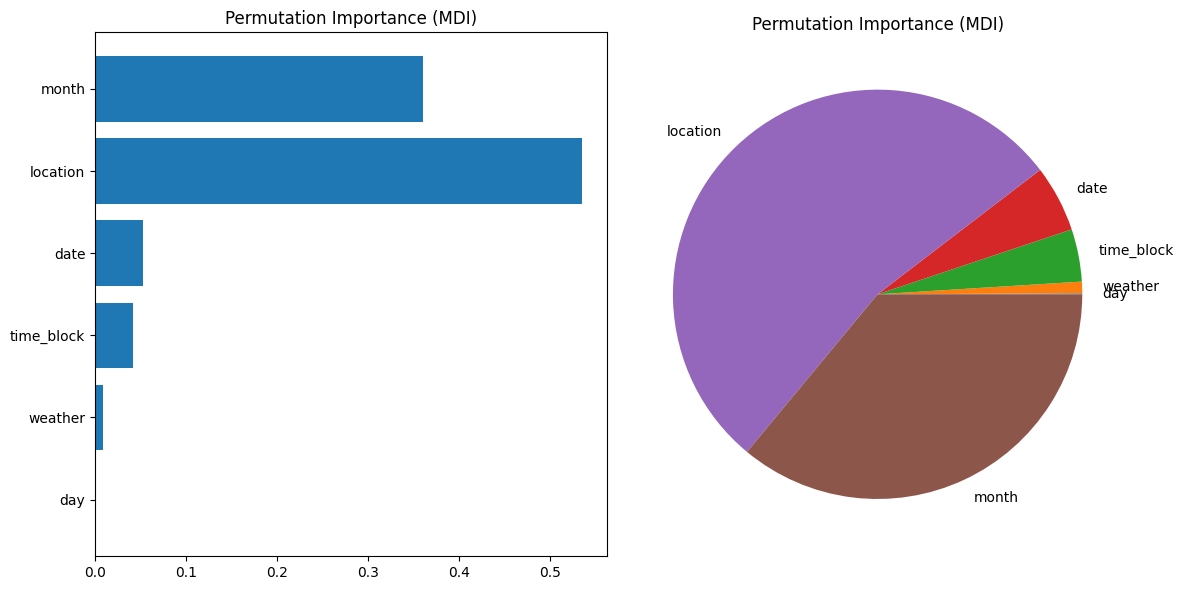

In [27]:
result = permutation_importance(
    model, X_test, Y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(colN)[sorted_idx])
plt.title("Permutation Importance (MDI)")

result = permutation_importance(
    model, X_test, Y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.pie(feature_importance[sorted_idx], labels = np.array(colN)[sorted_idx])
plt.title("Permutation Importance (MDI)")
fig.tight_layout()
plt.show()


# OPERATIONAL AREA

#### CUSTOM DATA INPUT

In [28]:
custom_data = pd.read_csv('/home/rafi/cse404/project/custom_input.csv')

In [29]:
custom_date = input('Enter Date ex: 1,2,3... : ')
custom_month = input('Enter Month ex jan, feb, mar... : ')
custom_time_zone = input('Enter Time in 24H : ')

#### CONVERTING HOUR TO TIME BLOCK

In [30]:
if '0000' <= custom_time_zone < '0400' :
    custom_time_block = 'a'
elif '0400' <= custom_time_zone < '0800' :
    custom_time_block = 'b'
elif '0800' <= custom_time_zone < '1200' :
    custom_time_block = 'c'
elif '1200' <= custom_time_zone < '1600' :
    custom_time_block = 'd'
elif '1600' <= custom_time_zone < '1800' :
    custom_time_block = 'e'
elif '1800' <= custom_time_zone < '2400' :
    custom_time_block = 'f'

#### CALCULATING DAY FROM DATE AND MONTH

In [31]:
custom_day_find = custom_date+' '+custom_month+' '+'2023'
day_name= ['mon', 'tue', 'wed', 'thu', 'fri', 'sat','sun']
custom_day = datetime.datetime.strptime(custom_day_find, '%d %b %Y').weekday()
custom_day = day_name[custom_day]


#### FETCHING WEATHER FORECAST FOR THE SPECIFIC INPUT

In [32]:
if custom_month in ['nov', 'dec', 'jan', 'feb'] :
    custom_weather = 2
elif custom_month in ['jul', 'aug', 'sep', 'oct'] :
    custom_weather = 3
else :
    custom_weather = 1

#### SAVING DATA TO CSV FILE

In [33]:
custom_data_input = pd.DataFrame([['mirpur_10', custom_month, custom_day, custom_date, custom_time_block, custom_weather ], 
                       ['mirpur_11', custom_month, custom_day, custom_date, custom_time_block, custom_weather ],
                       ['mirpur_12', custom_month, custom_day, custom_date, custom_time_block, custom_weather ],
                       ['mirpur_14', custom_month, custom_day, custom_date, custom_time_block, custom_weather ],
                       ['bijoy_shoroni', custom_month, custom_day, custom_date, custom_time_block, custom_weather ],
                       ['cantonment', custom_month, custom_day, custom_date, custom_time_block, custom_weather ],
                       ['jahangir_gate', custom_month, custom_day, custom_date, custom_time_block, custom_weather ],
                       ['kalshi', custom_month, custom_day, custom_date, custom_time_block, custom_weather ],
                       ['begum_rokeya', custom_month, custom_day, custom_date, custom_time_block, custom_weather ],
                       ['matikata', custom_month, custom_day, custom_date, custom_time_block, custom_weather ]], 
                      columns=['location', 'month', 'day', 'date', 'time_block', 'weather'])
custom_data_input.to_csv('custom_input.csv', index=False)

#### CUSTOM DATA PREPROCESSING

In [34]:
custom_encoded_location = le.fit_transform(custom_data['location'])
custom_encoded_month = le.fit_transform(custom_data['month'])
custom_encoded_day = le.fit_transform(custom_data['day'])
custom_encoded_date = le.fit_transform(custom_data['date'])
custom_encoded_time_block = le.fit_transform(custom_data['time_block'])
custom_encoded_weather = le.fit_transform(custom_data['weather'])

In [35]:
C = np.array(list(zip(custom_encoded_location, custom_encoded_month, custom_encoded_day, custom_encoded_date, custom_encoded_time_block, custom_encoded_weather)))

#### PREDICT CUSTOM DATA

In [36]:
prediction = model.predict(C)

#### MAP LOGIC

In [37]:
def show_map() :
    if route == route_A :
        display(Image(filename='a.png'))
        best_route_cost = prediction[5]+prediction[6]+prediction[4]+prediction[8]
        print('The best route for you is as followed :')
        print('ECB -> CANTONMENT -> JAHANGIR GATE -> BIJOY SHARANI -> BEGUM ROKEYA AVE -> AGARGAON')
        print('''The route is selected using 
              1. ARTIFICIAL INTELLIGENCE 
              2. MACHINE LEARNING 
              3. UNIFORMED COST SEARCH 
              having the minimum cost of ''', best_route_cost)
    elif route == route_B :
        display(Image(filename='b.png'))
        best_route_cost = prediction[9]+prediction[3]+prediction[6]+prediction[4]+prediction[8]
        print('The best route for you is as followed :')
        print('ECB -> MATIKATA -> MIRPUR 14 -> JAHANGIR GATE -> BIJOY SHARANI -> BEGUM ROKEYA AVE -> AGARGAON')
        print('''The route is selected using 
              1. ARTIFICIAL INTELLIGENCE 
              2. MACHINE LEARNING 
              3. UNIFORMED COST SEARCH 
              having the minimum cost of ''', best_route_cost)
    elif route == route_C :
        display(Image(filename='c.png'))
        best_route_cost = prediction[9]+prediction[3]+prediction[0]+prediction[8]
        print('The best route for you is as followed :')
        print('ECB -> MATIKATA -> MIRPUR 14 -> MIRPUR 10 -> BEGUM ROKEYA AVE -> AGARGAON')
        print('''The route is selected using 
              1. ARTIFICIAL INTELLIGENCE 
              2. MACHINE LEARNING 
              3. UNIFORMED COST SEARCH 
              having the minimum cost of ''', best_route_cost)
    elif route == route_D :
        display(Image(filename='d.png'))
        best_route_cost = prediction[7]+prediction[1]+prediction[0]+prediction[8]+prediction[3]+prediction[6]+prediction[4]
        print('The best route for you is as followed :')
        print('ECB -> KALSHI -> MIRPUR 11 -> MIRPUR 10 -> MIRPUR 14 -> JAHANGIR GATE -> BIJOY SHARANI -> BEGUM ROKEYA AVE -> AGARGAON')
        print('''The route is selected using 
              1. ARTIFICIAL INTELLIGENCE 
              2. MACHINE LEARNING 
              3. UNIFORMED COST SEARCH 
              having the minimum cost of ''', best_route_cost)
    elif route == route_E :
        display(Image(filename='e.png'))
        best_route_cost = prediction[7]+prediction[1]+prediction[0]+prediction[8]
        print('The best route for you is as followed :')
        print('ECB -> KALSHI -> MIRPUR 11 -> MIRPUR 10 -> BEGUM ROKEYA AVE -> AGARGAON')
        print('''The route is selected using 
              1. ARTIFICIAL INTELLIGENCE 
              2. MACHINE LEARNING 
              3. UNIFORMED COST SEARCH 
              having the minimum cost of ''', best_route_cost)
    elif route == route_F :
        display(Image(filename='f.png'))
        best_route_cost = prediction[7]+prediction[2]+prediction[0]+prediction[8]
        print('The best route for you is as followed :')
        print('ECB -> MIRPUR 12 -> MIRPUR 11 -> MIRPUR 10 -> BEGUM ROKEYA AVE -> AGARGAON')
        print('''The route is selected using 
              1. ARTIFICIAL INTELLIGENCE 
              2. MACHINE LEARNING 
              3. UNIFORMED COST SEARCH 
              having the minimum cost of ''', best_route_cost)
    else :
        print('No suitable route available! Try Again')

#### NODE BASED PREDICTION

In [38]:
print('Matikata         :', prediction[9])
print('Cantonment       :', prediction[5])
print('Mirpur 10        :', prediction[0])
print('Mirpur 11        :', prediction[1])
print('Mirpur 12        :', prediction[2])
print('Mirpur 14        :', prediction[3])
print('Begum Rokeya     :', prediction[8])
print('Bijoy Shoroni    :', prediction[4])
print('Jahangit Gate    :', prediction[6])
print('Kalshi           :', prediction[7])

Matikata         : 1.009796888597059
Cantonment       : 1.199708037000893
Mirpur 10        : 1.9907440947915949
Mirpur 11        : 1.9445244985104497
Mirpur 12        : 1.0111911667498945
Mirpur 14        : 1.9035899178754458
Begum Rokeya     : 1.9901391452456316
Bijoy Shoroni    : 1.889085841506112
Jahangit Gate    : 1.8468534754889179
Kalshi           : 1.009796888597059


# SHORTEST PATH SEARCH ALGORITHM

#### DEIFINING UNIFORM COST SEARCH

In [39]:
class Node(object):
    """This class represents a node in a graph."""
    
    def __init__(self, label: str=None):
        """
        Initialize a new node.
        
        Args:
            label: the string identifier for the node
        """
        self.label = label
        self.children = []
        
    def __lt__(self,other):
        """
        Perform the less than operation (self < other).
        
        Args:
            other: the other Node to compare to
        """
        return (self.label < other.label)
    
    def __gt__(self,other):
        """
        Perform the greater than operation (self > other).
        
        Args:
            other: the other Node to compare to
        """
        return (self.label > other.label)
    
    def __repr__(self):
        """Return a string form of this node."""
        return '{} -> {}'.format(self.label, self.children)
    
    def add_child(self, node, cost=1):
        """
        Add a child node to this node.
        
        Args:
            node: the node to add to the children
            cost: the cost of the edge (default 1)
        """
        edge = Edge(self, node, cost)
        self.children.append(edge)
    
    
class Edge(object):
    """This class represents an edge in a graph."""
    
    def __init__(self, source: Node, destination: Node, cost: int=1):
        """
        Initialize a new edge.
        
        Args:
            source: the source of the edge
            destination: the destination of the edge
            cost: the cost of the edge (default 1)
        """
        self.source = source
        self.destination = destination
        self.cost = cost
    
    def __repr__(self):
        """Return a string form of this edge."""
        return '{}: {}'.format(self.cost, self.destination.label)
    
def ucs(root, goal):
    """
    Return the uniform cost search path from root to gaol.
    
    Args:
        root: the starting node for the search
        goal: the goal node for the search
        
    Returns: a list with the path from root to goal
    
    Raises: ValueError if goal isn't in the graph
    """
    # create a priority queue of paths
    queue = PriorityQueue()
    queue.put((0, [root]))
    # iterate over the items in the queue
    while not queue.empty():
        # get the highest priority item
        pair = queue.get()
        current = pair[1][-1]
        # if it's the goal, return
        if current.label == goal:
            return pair[1]
        # add all the edges to the priority queue
        for edge in current.children:
            # create a new path with the node from the edge
            new_path = list(pair[1])
            new_path.append(edge.destination)
            # append the new path to the queue with the edges priority
            queue.put((pair[0] + edge.cost, new_path))

#### DEFINING NODES

In [40]:
ECB = Node('ECB')
CANTONMENT = Node('CANTONMENT')
MATIKATA = Node('MATIKATA')
KALSHI = Node('KALSHI')
MIRPUR_12 = Node('MIRPUR_12')
JAHANGIR_GATE = Node('JAHANGIR_GATE')
MIRPUR_14 = Node('MIRPUR_14')
MIRPUR_10 = Node('MIRPUR_10')
MIRPUR_11 = Node('MIRPUR_11')
BIJOY_SHARANI = Node('BIJOY_SHARANI')
BEGUM_ROKEYA = Node('BEGUM_ROKEYA')
AGARGAON = Node('AGARGAON')

In [41]:
route_A = ['ECB', 'CANTONMENT', 'JAHANGIR_GATE', 'BIJOY_SHARANI', 'BEGUM_ROKEYA', 'AGARGAON']
route_B = ['ECB', 'MATIKATA', 'MIRPUR_14', 'JAHANGIR_GATE', 'BIJOY_SHARANI', 'BEGUM_ROKEYA', 'AGARGAON']
route_C = ['ECB', 'MATIKATA', 'MIRPUR_14', 'MIRPUR_10', 'BEGUM_ROKEYA', 'AGARGAON']
route_D = ['ECB', 'KALSHI', 'MIRPUR_11', 'MIRPUR_10', 'MIRPUR_14', 'JAHANGIR_GATE', 'BIJOY_SHARANI', 'AGARGAON']
route_E = ['ECB', 'KALSHI', 'MIRPUR_11', 'MIRPUR_10', 'BEGUM_ROKEYA', 'AGARGAON']
route_F = ['ECB', 'MIRPUR_12', 'MIRPUR_11', 'MIRPUR_10', 'BEGUM_ROKEYA', 'AGARGAON']

#### ASSIGNING BRANCHES WITH PREDICTED VALUES

In [42]:
ECB.add_child(CANTONMENT, prediction[5]+0)
ECB.add_child(MATIKATA, prediction[9]+0)
ECB.add_child(KALSHI, prediction[7]+0)
ECB.add_child(MIRPUR_12, prediction[2]+0)

CANTONMENT.add_child(JAHANGIR_GATE, con()*prediction[6]+con()*prediction[5])

MATIKATA.add_child(MIRPUR_14, con()*prediction[3]+con()*prediction[9])

KALSHI.add_child(MIRPUR_11, con()*prediction[1]+con()*prediction[7])

MIRPUR_12.add_child(MIRPUR_11, con()*prediction[1]+con()*prediction[2])

JAHANGIR_GATE.add_child(BIJOY_SHARANI, con()*prediction[4]+con()*prediction[6])
JAHANGIR_GATE.add_child(MIRPUR_14, con()*prediction[3]+con()*prediction[6])

MIRPUR_11.add_child(MIRPUR_10, con()*prediction[0]+con()*prediction[1])

MIRPUR_10.add_child(MIRPUR_14, con()*prediction[3]+con()*prediction[0])

MIRPUR_14.add_child(MIRPUR_10, con()*prediction[0]+con()*prediction[3])
MIRPUR_14.add_child(JAHANGIR_GATE, con()*prediction[6]+con()*prediction[3])

BIJOY_SHARANI.add_child(BEGUM_ROKEYA, con()*prediction[8]+con()*prediction[4])

MIRPUR_10.add_child(BEGUM_ROKEYA, con()*prediction[8]+con()*prediction[0])

BEGUM_ROKEYA.add_child(AGARGAON, 0+con()*prediction[8])

#### OVERVIEW OF PREDICTED VALUES OF ALL NODES

In [43]:
_ = [print('*', node) for node in [ECB, CANTONMENT, MATIKATA, KALSHI, MIRPUR_12, JAHANGIR_GATE, MIRPUR_11, MIRPUR_14, MIRPUR_10, BIJOY_SHARANI, BEGUM_ROKEYA, AGARGAON]]

* ECB -> [1.199708037000893: CANTONMENT, 1.009796888597059: MATIKATA, 1.009796888597059: KALSHI, 1.0111911667498945: MIRPUR_12]
* CANTONMENT -> [5.445977586491597: JAHANGIR_GATE]
* MATIKATA -> [2.913386806472505: MIRPUR_14]
* KALSHI -> [5.908642774215018: MIRPUR_11]
* MIRPUR_12 -> [6.844764662281243: MIRPUR_11]
* JAHANGIR_GATE -> [9.360964475496171: BIJOY_SHARANI, 5.597296868853282: MIRPUR_14]
* MIRPUR_11 -> [11.805805779906134: MIRPUR_10]
* MIRPUR_14 -> [11.683002038001122: MIRPUR_10, 7.500886786728728: JAHANGIR_GATE]
* MIRPUR_10 -> [9.692257943209526: MIRPUR_14, 9.951905625320084: BEGUM_ROKEYA]
* BIJOY_SHARANI -> [9.647535815009599: BEGUM_ROKEYA]
* BEGUM_ROKEYA -> [1.9901391452456316: AGARGAON]
* AGARGAON -> []


In [44]:
route = []
for x in ucs(ECB, 'AGARGAON') :
    route_temp = str(x).split(' ')
    route.append(route_temp[0])

In [45]:
ucs(ECB, 'AGARGAON')

[ECB -> [1.199708037000893: CANTONMENT, 1.009796888597059: MATIKATA, 1.009796888597059: KALSHI, 1.0111911667498945: MIRPUR_12],
 MATIKATA -> [2.913386806472505: MIRPUR_14],
 MIRPUR_14 -> [11.683002038001122: MIRPUR_10, 7.500886786728728: JAHANGIR_GATE],
 MIRPUR_10 -> [9.692257943209526: MIRPUR_14, 9.951905625320084: BEGUM_ROKEYA],
 BEGUM_ROKEYA -> [1.9901391452456316: AGARGAON],
 AGARGAON -> []]

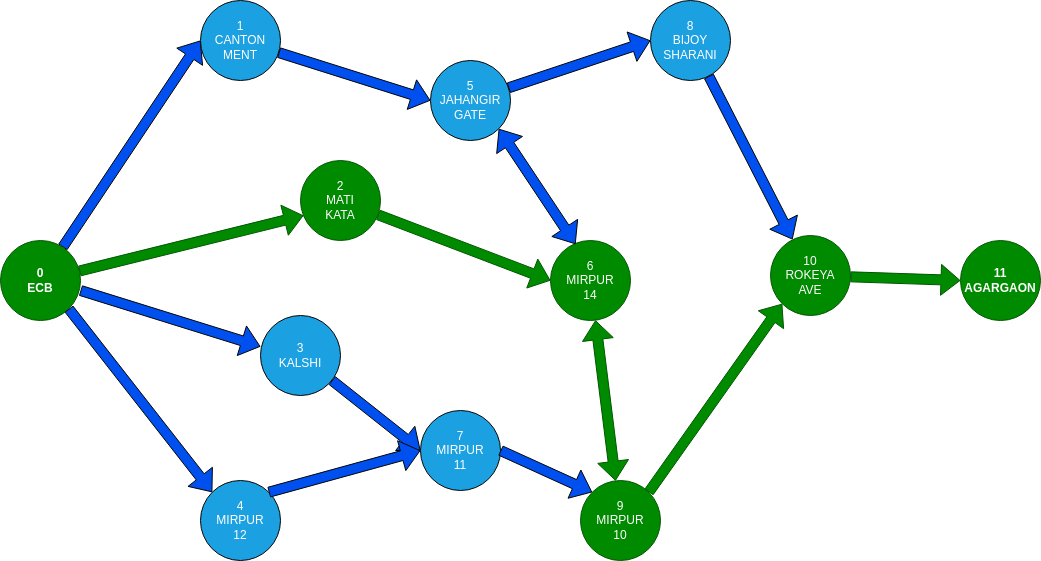

The best route for you is as followed :
ECB -> MATIKATA -> MIRPUR 14 -> MIRPUR 10 -> BEGUM ROKEYA AVE -> AGARGAON
The route is selected using 
              1. ARTIFICIAL INTELLIGENCE 
              2. MACHINE LEARNING 
              3. UNIFORMED COST SEARCH 
              having the minimum cost of  6.894270046509732


In [46]:
show_map()